In [165]:
#Assignment5
#Namrata R PES1201700921
#C Diya PES201700246
#Chiranth J PES1201701438

#modules to be imported
#! pip install librosa
from keras import layers, models, optimizers 
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical
from tqdm import tqdm
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from matplotlib.pyplot import imread
from keras.utils import to_categorical, np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [114]:
path1='styles.csv'
audio_path = r'C:\Users\diyas\Downloads\audio-data\The Big Bang Theory Season 6 Ep 21 - Best Scenes.wav'


In [115]:
#reading of csv using pandas
df=pd.read_csv(path1,error_bad_lines=False)
#adding an images column to store name of subsequent jpg
df['images'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
#df.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [116]:
#Question 1
#Classify the given set of images using a vanilla CNN( Don’t apply PCA for this!). 

#creating an array of the dimensions of the images 
#try and except has been used as suggested on the FAQ pages
train_image = []
y=[]
for i in tqdm(range(df.shape[0])):
    #print('images/'+str(df['images'][i]))
    try:
        img = image.load_img('images/'+str(df['images'][i]), target_size=(80,60,3))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        y.append(df['masterCategory'][i])
    except:
        continue
X = np.array(train_image)

100%|███████████████████████████████████████████████████████████████████████████| 44424/44424 [05:09<00:00, 143.63it/s]


In [117]:
#useing one hot encoding to encode the list of string obtained
code = np.array(y)
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(code)

In [118]:
y1=keras.utils.to_categorical(vec,num_classes=7)
#y1.shape

In [119]:
#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42, test_size=0.2)

In [120]:
#vanilla CNN
model=models.Sequential() 
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(80, 60,3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(7, activation='softmax')) 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1, validation_data=(X_test, y_test))

Train on 35535 samples, validate on 8884 samples
Epoch 1/10
35535/35535 [==============================] - ETA: 7:34 - loss: 2.0017 - acc: 0.003 - ETA: 4:04 - loss: 1.8299 - acc: 0.234 - ETA: 3:28 - loss: 1.7879 - acc: 0.313 - ETA: 2:42 - loss: 1.7553 - acc: 0.318 - ETA: 2:14 - loss: 1.6870 - acc: 0.359 - ETA: 1:55 - loss: 1.6016 - acc: 0.382 - ETA: 1:42 - loss: 1.5502 - acc: 0.397 - ETA: 1:32 - loss: 1.5136 - acc: 0.384 - ETA: 1:24 - loss: 1.4730 - acc: 0.396 - ETA: 1:18 - loss: 1.4266 - acc: 0.434 - ETA: 1:12 - loss: 1.4268 - acc: 0.441 - ETA: 1:08 - loss: 1.4252 - acc: 0.421 - ETA: 1:04 - loss: 1.4062 - acc: 0.442 - ETA: 1:01 - loss: 1.3791 - acc: 0.459 - ETA: 58s - loss: 1.3468 - acc: 0.476 - ETA: 55s - loss: 1.3178 - acc: 0.49 - ETA: 53s - loss: 1.2947 - acc: 0.49 - ETA: 51s - loss: 1.2830 - acc: 0.50 - ETA: 49s - loss: 1.2617 - acc: 0.52 - ETA: 48s - loss: 1.2413 - acc: 0.53 - ETA: 46s - loss: 1.2198 - acc: 0.54 - ETA: 45s - loss: 1.2101 - acc: 0.54 - ETA: 44s - loss: 1.1971 - ac

In [130]:
print("Accuracy of vanilla CNN for the dataset is oberved to be 98.76% in the 10th(last) epoch")

Accuracy of vanilla CNN for the dataset is oberved to be 98.76% in the 10th(last) epoch


In [122]:
#Question 2
# PCA is one of the most common dimensionality reduction techniques used. 
#Using PCA with number of components ranging from 2 to 5, classify the given set of images using
#a. K-Nearest Neighbours ( consider k=7) 
#b. Artificial Neural Network 

#PCA n=2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#shaping the dimensions of X(images array)
X.shape=(3553520,180)
principalComponents = pca.fit_transform(X)


In [123]:
principalComponents.shape=(44419,80,2)

In [124]:
#splitting test and train on the PCA values
X_train, X_test, y_train, y_test= train_test_split(principalComponents,y1, test_size=1/7.0, random_state=0)

In [125]:
#KNN for K=7
X_train.shape=(38073,160)
X_test.shape=(6346,160)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [126]:
#prediction 
y_pred = classifier.predict(X_test)

In [128]:
#print classification_report and accuracy
#print(confusion_matrix(y_test, y_pred))
print("For n=2 using KNN")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test,y_pred)
print("Accuracy for n=2 using KNN",score)

For n=2 using KNN
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1532
           1       0.98      0.98      0.98      3141
           2       0.98      0.97      0.98      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.91      0.83      0.87       357
           6       1.00      1.00      1.00         1

   micro avg       0.96      0.96      0.96      6346
   macro avg       0.68      0.67      0.68      6346
weighted avg       0.96      0.96      0.96      6346
 samples avg       0.96      0.96      0.96      6346

Accuracy for n=2 using KNN 0.9554049795146549


In [129]:
#ANN 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [131]:
predictions = mlp.predict(X_test)

In [134]:
#print classification_report and accuracy
#print(confusion_matrix(y_test,predictions))
print("For n=2 using ANN")
print(classification_report(y_test,predictions))
score1= accuracy_score(y_test,predictions)
print("Accuracy For n=2 using ANN",score1)


#this same procedure has been repeated for KNN and ANN classification with n=2,3,4,5(PCA)

For n=2 using ANN
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1532
           1       0.97      0.97      0.97      3141
           2       0.98      0.96      0.97      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.89      0.89      0.89       357
           6       0.00      0.00      0.00         1

   micro avg       0.96      0.95      0.95      6346
   macro avg       0.54      0.53      0.54      6346
weighted avg       0.96      0.95      0.95      6346
 samples avg       0.95      0.95      0.95      6346

Accuracy For n=2 using ANN 0.9443744090765837


In [135]:
#PCA n=3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X.shape=(3553520,180)
principalComponents = pca.fit_transform(X)
principalComponents.shape=(44419,80,3)
#splitting test ans train
X_train, X_test, y_train, y_test= train_test_split(principalComponents,y1, test_size=1/7.0, random_state=0)

In [136]:
#KNN for K=7
X_train.shape=(38073,80*3)
X_test.shape=(6346,80*3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [139]:
y_pred = classifier.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
print("For n=3 using KNN")
print(classification_report(y_test, y_pred))
score2 = accuracy_score(y_test,y_pred)
print("For n=3 using KNN",score2)

For n=3 using KNN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1532
           1       0.98      0.98      0.98      3141
           2       0.99      0.99      0.99      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.92      0.85      0.88       357
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.97      0.97      6346
   macro avg       0.55      0.54      0.54      6346
weighted avg       0.97      0.97      0.97      6346
 samples avg       0.97      0.97      0.97      6346

For n=3 using KNN 0.9658052316419792


In [140]:
#ANN 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [141]:
predictions = mlp.predict(X_test)
#print(confusion_matrix(y_test,predictions))
print("For n=3 using ANN")
print(classification_report(y_test,predictions))
score3= accuracy_score(y_test,predictions)
print("For n=3 using ANN",score3)

For n=3 using ANN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1532
           1       0.98      0.97      0.97      3141
           2       0.98      0.99      0.99      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.96      0.86      0.91       357
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.96      0.96      6346
   macro avg       0.55      0.54      0.54      6346
weighted avg       0.96      0.96      0.96      6346
 samples avg       0.96      0.96      0.96      6346

For n=3 using ANN 0.9604475260006303


In [142]:
#PCA n=4
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X.shape=(3553520,180)
principalComponents = pca.fit_transform(X)
principalComponents.shape=(44419,80,4)
#splitting test ans train
X_train, X_test, y_train, y_test= train_test_split(principalComponents,y1, test_size=1/7.0, random_state=0)

In [143]:
#KNN for K=7
X_train.shape=(38073,80*4)
X_test.shape=(6346,80*4)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [144]:
y_pred = classifier.predict(X_test)
print("For n=4 using KNN")
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
score5= accuracy_score(y_test,y_pred)
print("Accuracy For n=4 using KNN",score5)

For n=4 using KNN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1532
           1       0.98      0.98      0.98      3141
           2       0.99      0.99      0.99      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.94      0.85      0.89       357
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.97      0.97      6346
   macro avg       0.55      0.54      0.54      6346
weighted avg       0.97      0.97      0.97      6346
 samples avg       0.97      0.97      0.97      6346

Accuracy For n=4 using KNN 0.9675386069965333


In [145]:
#ANN 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [146]:
predictions = mlp.predict(X_test)
print("For n=4 using ANN")
#print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
score6= accuracy_score(y_test,predictions)
print("Accuracy For n=4 using ANN",score6)

For n=4 using ANN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1532
           1       0.98      0.98      0.98      3141
           2       0.98      0.99      0.99      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.94      0.89      0.91       357
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.96      0.97      6346
   macro avg       0.55      0.54      0.55      6346
weighted avg       0.97      0.96      0.97      6346
 samples avg       0.96      0.96      0.96      6346

Accuracy For n=4 using ANN 0.9632839583989915


In [147]:
#PCA n=5
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X.shape=(3553520,180)
principalComponents = pca.fit_transform(X)
principalComponents.shape=(44419,80,5)
#splitting test ans train
X_train, X_test, y_train, y_test= train_test_split(principalComponents,y1, test_size=1/7.0, random_state=0)

In [148]:
#KNN for K=7
X_train.shape=(38073,80*5)
X_test.shape=(6346,80*5)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [149]:
y_pred = classifier.predict(X_test)
print("For n=5 using KNN")
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
score7= accuracy_score(y_test,y_pred)
print("For n=5 using KNN",score7)

For n=5 using KNN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1532
           1       0.98      0.98      0.98      3141
           2       0.99      0.99      0.99      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.93      0.80      0.86       357
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.96      0.97      6346
   macro avg       0.55      0.53      0.54      6346
weighted avg       0.97      0.96      0.97      6346
 samples avg       0.96      0.96      0.96      6346

For n=5 using KNN 0.9647021745981721


In [150]:
#ANN 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
predictions = mlp.predict(X_test)
#print(confusion_matrix(y_test,predictions))
print("For n=5 using ANN")
print(classification_report(y_test,predictions))
score8= accuracy_score(y_test,predictions)
print("Accuracy For n=5 using ANN",score8)

For n=5 using ANN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1532
           1       0.98      0.97      0.98      3141
           2       0.99      0.99      0.99      1304
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.85      0.88      0.86       357
           6       0.00      0.00      0.00         1

   micro avg       0.96      0.96      0.96      6346
   macro avg       0.54      0.54      0.54      6346
weighted avg       0.96      0.96      0.96      6346
 samples avg       0.96      0.96      0.96      6346

Accuracy For n=5 using ANN 0.9583989914907028


In [154]:
#3. Compare the three models with respect to the accuracy for  both train and test. Do you think the result obtained will be the same given a more complex data set? 
print("Summary and comparison between various models implemented :\n")
print("Accuracy for CNN",98.76,"%\n")
print("PCA for n=2:")
print("Accuracy for KNN(k=7)",score*100,"%")
print("Accuracy for ANN",score1*100,"%\n")
print("PCA for n=3:")
print("Accuracy for KNN(k=7)",score2*100,"%")
print("Accuracy for ANN",score3*100,"%\n")
print("PCA for n=4:")
print("Accuracy for KNN(k=7)",score5*100,"%")
print("Accuracy for ANN",score6*100,"%\n")
print("PCA for n=5:")
print("Accuracy for KNN(k=7)",score7*100,"%")
print("Accuracy for ANN",score8*100,"%\n")
print("According to the results above, vanilla CNN appears to be the best.Results obtained will be the same given a more complex data set because in terms of performance, CNNs outperform NNs and KNNS on conventional image recognition tasks.")

Summary and comparison between various models implemented :

Accuracy for CNN 98.76 %

PCA for n=2:
Accuracy for KNN(k=7) 95.54049795146548 %
Accuracy for ANN 94.43744090765837 %

PCA for n=3:
Accuracy for KNN(k=7) 96.58052316419791 %
Accuracy for ANN 96.04475260006303 %

PCA for n=4:
Accuracy for KNN(k=7) 96.75386069965333 %
Accuracy for ANN 96.32839583989914 %

PCA for n=5:
Accuracy for KNN(k=7) 96.4702174598172 %
Accuracy for ANN 95.83989914907029 %

According to the results above, vanilla CNN appears to be the best.Results obtained will be the same given a more complex data set because in terms of performance, CNNs outperform NNs and KNNS on conventional image recognition tasks.


In [155]:
print("References: https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/")

References: https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/


In [156]:
#Question 2
'''Amy has come up with a series of exercises to help with Sheldon’s need for closure. 
The dataset Big Bang Theoryhas an audio clip which contains the best scenes from one of the episodes.
Use this audio clip to extract the following features and display their dimension:
1.MFCC
2.Zero Crossing rate
3.Spectral Centroids
4.Pitch
5.Root Mean Square for the signal
Find out the use of each of the above feature. Using these features, given a problem of content classification
(eg. laughter track vs dialog), which algorithm would you use to classify and why?'''

'Amy has come up with a series of exercises to help with Sheldon’s need for closure. \nThe dataset Big Bang Theoryhas an audio clip which contains the best scenes from one of the episodes.\nUse this audio clip to extract the following features and display their dimension:\n1.MFCC\n2.Zero Crossing rate\n3.Spectral Centroids\n4.Pitch\n5.Root Mean Square for the signal\nFind out the use of each of the above feature. Using these features, given a problem of content classification\n(eg. laughter track vs dialog), which algorithm would you use to classify and why?'

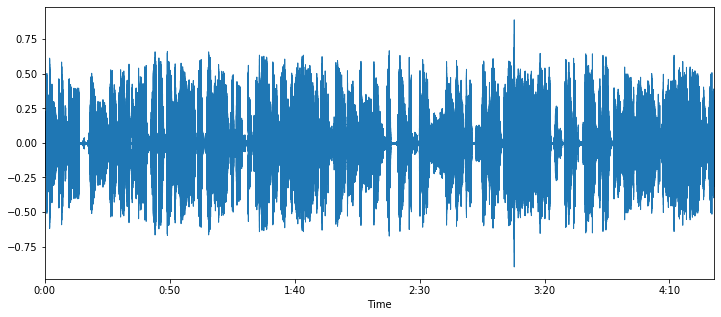

In [157]:
x , sr = librosa.load(audio_path)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=sr)

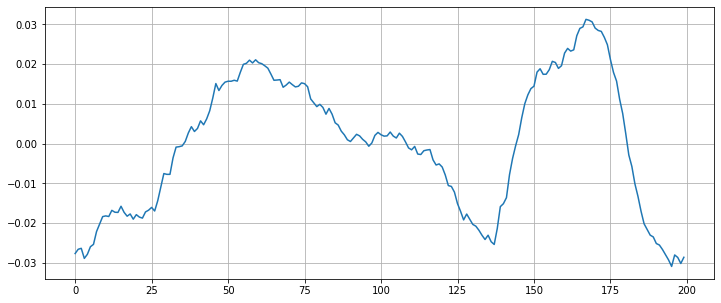

In [158]:
#plotting a more zoomed in version of the audio signal
n0 = 8000
n1 = 8200
plt.figure(figsize=(12, 5))
plt.plot(x[n0:n1])
plt.grid()

In [159]:
#1. MFCC
print("MFCC — Mel Frequency Cepstral Co-efficients. The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. For example in Music Information Retrieval, it is often used to describe timbre.") 
mfcc = librosa.feature.mfcc(x, sr=sr)
print("MFCC:", mfcc)
print("Dimensions:",mfcc.shape)

MFCC — Mel Frequency Cepstral Co-efficients. The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. For example in Music Information Retrieval, it is often used to describe timbre.
MFCC: [[-539.871     -539.871     -379.66885   ... -151.52533   -132.81361
  -138.85701  ]
 [   0.           0.         123.122604  ...  128.4087     123.3772
   115.44869  ]
 [   0.           0.          26.443422  ...  -80.28901    -79.40747
   -66.79495  ]
 ...
 [   0.           0.           3.5730817 ...   -2.3635604   -0.7761585
     8.097237 ]
 [   0.           0.           2.6215496 ...    5.851412    13.78367
    17.292326 ]
 [   0.           0.           2.0217834 ...    3.443552     4.885784
     5.1737185]]
Dimensions: (20, 11543)


In [160]:
#2. Zero Crossing Rate
print("A simple way for measuring smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. a zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero")

zero_crossings = librosa.zero_crossings(x)
print("zero crossings:", zero_crossings)
print("dimensions:",zero_crossings.shape)
print("overall:",sum(zero_crossings))

zero_crossing_rate= librosa.feature.zero_crossing_rate(x)
print("zero crossing rate:", zero_crossing_rate)
print("dimensions:",zero_crossing_rate.shape)
print("overall:",sum(zero_crossing_rate))

A simple way for measuring smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. a zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero
zero crossings: [ True False False ...  True False False]
dimensions: (5909504,)
overall: 850851
zero crossing rate: [[0.         0.03808594 0.05126953 ... 0.12207031 0.09326172 0.06396484]]
dimensions: (1, 11543)
overall: [0.         0.03808594 0.05126953 ... 0.12207031 0.09326172 0.06396484]


In [161]:
#3. Spectral centroids
print("The spectral centroid indicates at which frequency the energy of a spectrum is centered upon. It is like a weighted mean")
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print("Spectral centroid dimensions:",spectral_centroids.shape)
print("Spectral centroid:",spectral_centroids)


The spectral centroid indicates at which frequency the energy of a spectrum is centered upon. It is like a weighted mean
Spectral centroid dimensions: (11543,)
Spectral centroid: [   0.         3902.82448717 1188.75814592 ... 1766.41286656 1824.89471963
 1861.63947285]


In [162]:
#4. Pitch
print("Pitch is one of the characteristics of a speech signal and is measured as the frequency of the signal.Pitch is the fundamental period of the speech signal.Pitch is a perceptual property that allows the ordering of sounds on a frequency-related scale. Pitch is referred as fundamental frequency")
pitch , mg= librosa.piptrack(y=x,sr=sr)
print("Pitch:", pitch)
print("dimensions: ",pitch.shape)

Pitch is one of the characteristics of a speech signal and is measured as the frequency of the signal.Pitch is the fundamental period of the speech signal.Pitch is a perceptual property that allows the ordering of sounds on a frequency-related scale. Pitch is referred as fundamental frequency
Pitch: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
dimensions:  (1025, 11543)


In [163]:
#5.RMS
print("RMS is the root-mean-square value of a signal. it represents the average 'power' of a signal.")
rms=librosa.feature.rms(x)
print("RMS: ",rms)
print("Dimension of rms:", rms.shape)

RMS is the root-mean-square value of a signal. it represents the average 'power' of a signal.
RMS:  [[0.0000000e+00 1.6496797e-05 4.0288899e-02 ... 6.2249143e-02
  6.9209576e-02 7.4210189e-02]]
Dimension of rms: (1, 11543)


In [164]:
# which is the best model among these for content classification
print("MFCC is the best option for audio content classification as the help distinguishing and hence classify the audio signal better. In real world applictions as well they are used for speech identification and audio classification. MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale, and are thus suitable for speech recognition. Hence by using this method  for feature extraction and further running any model on it will help with content based audio classification .")

MFCC is the best option for audio content classification as the help distinguishing and hence classify the audio signal better. In real world applictions as well they are used for speech identification and audio classification. MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale, and are thus suitable for speech recognition. Hence by using this method  for feature extraction and further running any model on it will help with content based audio classification .
